Hypoth√®ses test√©es et r√©sultats :

1. Les femmes sont plus nombreuses √† r√©silier que les hommes<br>
‚úÖ Test du Khi¬≤ ‚Üí p-value ‚âà 0 ‚Üí Nous avons suffisamment d‚Äô√©vidence pour rejeter H‚ÇÄ<br>
üìå Le sexe est un facteur significativement associ√© √† la r√©siliation.

2. Les clients ayant 1 seul produit r√©silient plus que ceux en ayant 2<br>
‚úÖ Test du Khi¬≤ ‚Üí p-value ‚âà 0 ‚Üí H‚ÇÄ rejet√©e<br>
üìå Poss√©der peu de produits est corr√©l√© √† un taux de churn plus √©lev√©.

3. Les clients allemands r√©silient plus que les Fran√ßais et Espagnols<br>
‚úÖ Test du Khi¬≤ sur la variable Geography ‚Üí p-value ‚âà 0 ‚Üí H‚ÇÄ rejet√©e<br>
üìå Le pays d‚Äôorigine influence significativement le comportement de r√©siliation.

4. Les clients actifs r√©silient plus que les clients inactifs<br>
‚úÖ Test du Khi¬≤ ‚Üí p-value ‚âà 0 ‚Üí H‚ÇÄ rejet√©e<br>
üìå √Ä l‚Äôinverse de ce qu‚Äôon pourrait penser, l'activit√© est li√©e √† un taux de churn plus √©lev√© dans cet √©chantillon.

5. Les clients avec un solde √©lev√© r√©silient plus souvent<br>
‚úÖ Test de student √† 2 √©chantillons ind√©pendants ‚Üí p-value ‚âà 0 ‚Üí H‚ÇÄ rejet√©e<br>
üìå Un solde plus √©lev√© est associ√© √† un risque de r√©siliation accru.

6. Les clients √¢g√©s de 44 ans et plus r√©silient plus souvent<br>
‚úÖ Test de student √† 2 √©chantillons ind√©pendants ‚Üí p-value ‚âà 0 ‚Üí H‚ÇÄ rejet√©e<br>
üìå L‚Äô√¢ge est un facteur significativement li√© √† la r√©siliation.

In [23]:
### Import des packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

In [2]:
df_train = pd.read_csv("train_data.csv")
df_train

ID  CustomerId        Surname  CreditScore Geography  Gender  \
0        37765    15794860         Ch'eng          627    France    Male   
1       130453    15728005     Hargreaves          597    France    Male   
2        77297    15686810          Ts'ui          724    France    Male   
3        40858    15760244      Trevisano          663   Germany  Female   
4        19804    15810563         French          627    France  Female   
...        ...         ...            ...          ...       ...     ...   
143574   97639    15759915       Onwumelu          559   Germany    Male   
143575   95939    15769974           Shih          597   Germany    Male   
143576  152315    15592028          Hsiao          576     Spain    Male   
143577  117952    15804009         Ch'ang          751    France  Female   
143578   43567    15771409  Chukwukadibia          718   Germany  Female   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       28.0       7  131694.04              1        1.0             1.0   
1       34.0       2       0.00              2        0.0             1.0   
2       39.0       7       0.00              2        1.0             1.0   
3       56.0       5  118577.24              3        1.0             0.0   
4       33.0       5       0.00              2        1.0             1.0   
...      ...     ...        ...            ...        ...             ...   
143574  45.0       3  111634.29              1        1.0             1.0   
143575  41.0      10  119182.73              1        0.0             0.0   
143576  31.0       6  127299.56              1        1.0             1.0   
143577  27.0       4   90721.11              1        0.0             0.0   
143578  40.0       1  131753.99              1        1.0             0.0   

        EstimatedSalary  Exited  
0             161205.61       0  
1             181419.29       0  
2             100862.54       0  
3              61164.45       1  
4             103737.82       0  
...                 ...     ...  
143574        103349.74       0  
143575        121299.14       0  
143576         57569.89       0  
143577         84496.78       0  
143578        140937.98       1  

[143579 rows x 14 columns]

# 1. Les femmes sont plus nombreuses √† r√©silier que les hommes

Test chi2 contingency

HO : "Le nombre de clients qui r√©silient (Exited) et le sexe (Gender) sont 2 variables ind√©pendantes l'une de l'autre"

In [3]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["Gender"])
contingency_table

Gender  Female   Male
Exited               
0        45038  68091
1        17575  12875

In [4]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(3127.515772767467), pvalue=np.float64(0.0), dof=1, expected_freq=array([[49334.13714401, 63794.86285599],
       [13278.86285599, 17171.13714401]]))

In [5]:
pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=df_train["Gender"].sort_values().unique(),
    index=df_train["Exited"].sort_values().unique(),
).round()

Female     Male
0  49334.0  63795.0
1  13279.0  17171.0

<Axes: xlabel='Gender', ylabel='Exited'>

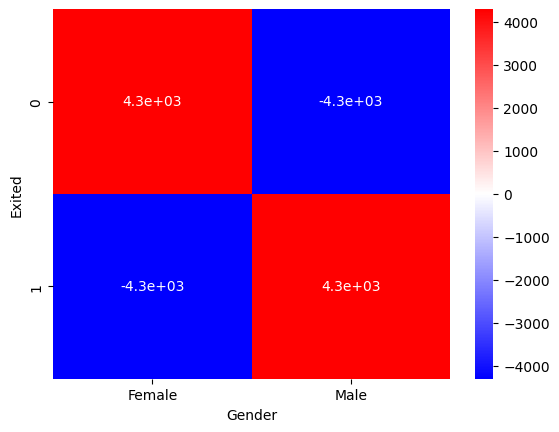

In [6]:
expected = chi2_contingency(contingency_table).expected_freq

expected_df = pd.DataFrame(expected, 
                           index=contingency_table.index, 
                           columns=contingency_table.columns
                           ).round()

diff = expected_df - contingency_table


sns.heatmap(diff, annot=True, cmap="bwr")

In [7]:
print("HO : 'Le nombre de clients qui r√©silient (Exited) et le sexe (Gender) sont 2 variables ind√©pendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'√©vidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'√©vidence pour rejeter H0")

HO : 'Le nombre de clients qui r√©silient (Exited) et le sexe (Gender) sont 2 variables ind√©pendantes l'une de l'autre'
Nous avons suffisament d'√©vidence pour rejeter H0


üëâ Le test du œá¬≤ (p-value ‚âà 0) rejette l‚Äôhypoth√®se d‚Äôind√©pendance entre le sexe et la r√©siliation.

On observe une **sur-repr√©sentation des femmes** parmi les clients qui r√©silient, et une **sur-repr√©sentation des hommes** parmi ceux qui restent.

Ainsi, **le genre a une influence significative sur le churn**.


# 2. Les clients ayant 1 produit sont plus nombreuses √† r√©silier que ceux en ayant 2

Test chi2 contingency

H0 : "Le nombre de produit d√©tenu par les clients (NumOfProducts) et le nombre de r√©siliation (Exited) <br>
sont 2 variables ind√©pendantes l'une de l'autre."

In [8]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["NumOfProducts"])
contingency_table

NumOfProducts      1      2     3    4
Exited                                
0              43905  68879   292   53
1              23459   4422  2218  351

In [9]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(25393.715822144062), pvalue=np.float64(0.0), dof=3, expected_freq=array([[53077.55281761, 57755.44354676,  1977.6832963 ,   318.32033933],
       [14286.44718239, 15545.55645324,   532.3167037 ,    85.67966067]]))

In [10]:
expected = chi2_contingency(contingency_table).expected_freq

pd.DataFrame(
    expected,
    columns=contingency_table.columns,
    index=contingency_table.index,
    ).round()

NumOfProducts        1        2       3      4
Exited                                        
0              53078.0  57755.0  1978.0  318.0
1              14286.0  15546.0   532.0   86.0

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

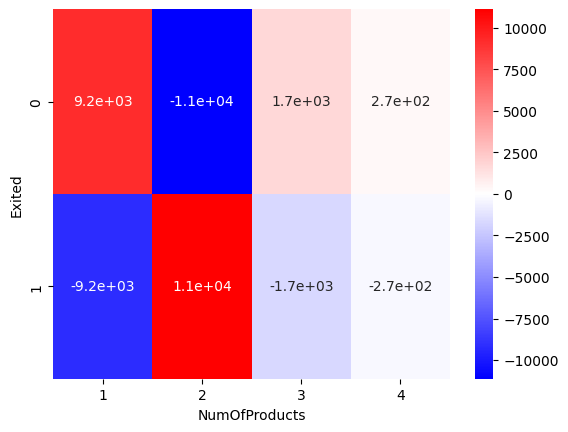

In [11]:
diff = expected - contingency_table

sns.heatmap(diff, annot=True, cmap="bwr")

In [12]:
print("H0 : 'Le nombre de clients qui r√©silient (Exited) et le nombre de produits souscrits (NumOfProducts) sont 2 variables ind√©pendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'√©vidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'√©vidence pour rejeter H0")

H0 : 'Le nombre de clients qui r√©silient (Exited) et le nombre de produits souscrits (NumOfProducts) sont 2 variables ind√©pendantes l'une de l'autre'
Nous avons suffisament d'√©vidence pour rejeter H0


# 3. Les clients allemands sont plus nombreux √† r√©silier que les clients Fran√ßais et Espagnol

Test chi2 contingency

H0 : "Le nombre de clients ayant r√©sili√© (Exited) et le pays d'origine (Geography)<br> 
sont 2 variables ind√©pendantes l'une de l'autre." 

In [13]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["Geography"])
contingency_table

Geography  France  Germany  Spain
Exited                           
0           68338    18657  26134
1           13548    11448   5454

In [14]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(6455.578335753235), pvalue=np.float64(0.0), dof=2, expected_freq=array([[64519.75075742, 23720.38073117, 24888.86851141],
       [17366.24924258,  6384.61926883,  6699.13148859]]))

In [15]:
pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round()

Geography   France  Germany    Spain
Exited                              
0          64520.0  23720.0  24889.0
1          17366.0   6385.0   6699.0

<Axes: xlabel='Geography', ylabel='Exited'>

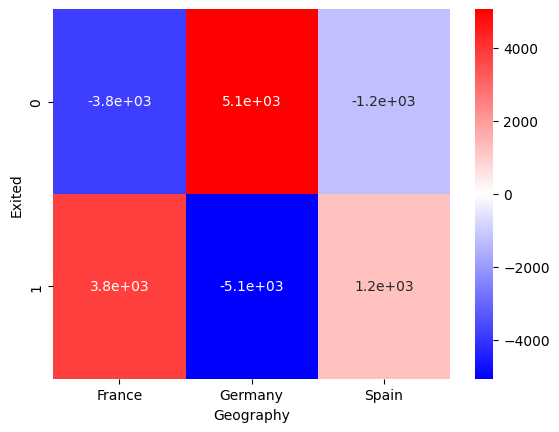

In [16]:
expected = chi2_contingency(contingency_table).expected_freq

diff = pd.DataFrame(
    chi2_contingency(contingency_table).expected_freq,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round() - contingency_table

sns.heatmap(diff, annot=True, cmap="bwr")

In [17]:
print("H0 : 'Le nombre de clients qui r√©silient (Exited) et la g√©ographie (Geography) sont 2 variables ind√©pendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'√©vidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'√©vidence pour rejeter H0")

H0 : 'Le nombre de clients qui r√©silient (Exited) et la g√©ographie (Geography) sont 2 variables ind√©pendantes l'une de l'autre'
Nous avons suffisament d'√©vidence pour rejeter H0


# 4. Les clients actifs sont plus nombreux √† r√©silier que les clients inactif

Test chi2 contingency

H0 : "Le nombre de clients actif (IsActiveMember) et le nombre de clients qui r√©silient (Exited) sont 2 variables<br> 
ind√©pendantes l'une de l'autre"

In [18]:
contingency_table = pd.crosstab(df_train["Exited"], df_train["IsActiveMember"])
contingency_table

IsActiveMember    0.0    1.0
Exited                      
0               50742  62387
1               21507   8943

In [19]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=np.float64(6376.075432276614), pvalue=np.float64(0.0), dof=1, expected_freq=array([[56926.5499899, 56202.4500101],
       [15322.4500101, 15127.5499899]]))

In [20]:
expected = chi2_contingency(contingency_table).expected_freq

pd.DataFrame(
    expected,
    columns=contingency_table.columns,
    index=contingency_table.index,
).round()

IsActiveMember      0.0      1.0
Exited                          
0               56927.0  56202.0
1               15322.0  15128.0

In [21]:
print("H0 : 'Le nombre de clients qui r√©silient (Exited) et le statut d'adh√©sion (IsActiveMember) sont 2 variables ind√©pendantes l'une de l'autre'")

alpha = 0.02
p_value = chi2_contingency(contingency_table).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'√©vidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'√©vidence pour rejeter H0")

H0 : 'Le nombre de clients qui r√©silient (Exited) et le statut d'adh√©sion (IsActiveMember) sont 2 variables ind√©pendantes l'une de l'autre'
Nous avons suffisament d'√©vidence pour rejeter H0


# 5. Les clients ayant un solde √©lev√©e sont plus nombreux √† r√©silier (Attention avec m√©diane √† 0 FR et ES)

Test de student

H0 : "Les clients qui ont r√©sili√© ont en moyenne un solde √©gal aux autres." 

In [22]:
df_train.groupby("Exited")["Balance"].describe()

count          mean           std  min  25%       50%        75%  \
Exited                                                                        
0       113129.0  51274.230558  62196.885812  0.0  0.0      0.00  116811.12   
1        30450.0  71358.363247  62606.860862  0.0  0.0  98959.19  125521.18   

              max  
Exited             
0       250898.09  
1       238387.56

- Les variances sont sensiblement identiques
- Les donn√©es sont ind√©pendantes
- Il y a plus de 30 lignes de donn√©es pour chaque groupe (TCL)

-"Les donn√©es sont ind√©pendantes car chaque observation (client) est distincte et ne d√©pend pas des autres. Il n'y a pas de duplication ou de lien entre les clients dans le dataset."

In [25]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["Balance"], df_NoExited["Balance"])

TtestResult(statistic=np.float64(49.94722364010174), pvalue=np.float64(0.0), df=np.float64(143577.0))

In [28]:
print("H0 : 'Les clients qui ont r√©sili√© ont un solde moyen identique √† celui des clients qui n‚Äôont pas r√©sili√©.'")

alpha = 0.02
p_value = ttest_ind(df_exited["Balance"], df_NoExited["Balance"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'√©vidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'√©vidence pour rejeter H0")

H0 : 'Les clients qui ont r√©sili√© ont un solde moyen identique √† celui des clients qui n‚Äôont pas r√©sili√©.'
Nous avons suffisament d'√©vidence pour rejeter H0


# 6. Les clients de 44 ans et plus sont plus nombreux √† r√©silier

Test de student

H0 : "Les clients qui r√©silient ont le m√™me √¢ge moyen que ceux qui ne r√©silient pas."

In [29]:
df_train.groupby("Exited")["Age"].describe()

count       mean       std   min   25%   50%   75%   max
Exited                                                             
0       113129.0  36.583765  8.166737  18.0  31.0  36.0  40.0  92.0
1        30450.0  43.942890  8.981339  18.0  38.0  44.0  50.0  92.0

In [30]:
df_exited = df_train.query("Exited == 1")
df_NoExited = df_train.query("Exited == 0")

ttest_ind(df_exited["Age"], df_NoExited["Age"])

TtestResult(statistic=np.float64(136.5764217714973), pvalue=np.float64(0.0), df=np.float64(143577.0))

In [31]:
print("H0 : 'Les clients qui r√©silient ont le m√™me √¢ge moyen que ceux qui ne r√©silient pas.'")

alpha = 0.02
p_value = ttest_ind(df_exited["Age"], df_NoExited["Age"]).pvalue

if p_value < alpha:
    print("Nous avons suffisament d'√©vidence pour rejeter H0")
else:
    print("Nous n'avons pas suffisament d'√©vidence pour rejeter H0")

H0 : 'Les clients qui r√©silient ont le m√™me √¢ge moyen que ceux qui ne r√©silient pas.'
Nous avons suffisament d'√©vidence pour rejeter H0
